In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import numpy as np

In [56]:
from skimage.feature import blob_dog, blob_log, blob_doh

In [12]:
def laplacian_g(x, y, sigma):
    x2 = x**2
    y2 = y**2
    sigma4 = sigma**4
    sigma2 = sigma**2

    return -1*(1/(np.pi*sigma4))*(1-((x2+y2)/(2*sigma2)))*np.exp(-1*(x2+y2)/(2*sigma2))

In [13]:
def filterImg(img, fil):
    fil = fil.astype('float')
    img = img.astype('float')
    # this holds the end result
    filtered = np.zeros_like(img)
    width = int((fil.shape[1]-1)/2)
    height = int((fil.shape[0]-1)/2)

    for i in range(height,img.shape[1]-height):
        for j in range(width,img.shape[0]-width):
            filtered[j,i]= np.sum(fil * img[j-width:j+width+1, i-height:i+height+1])
    
    return filtered

In [14]:
def LoG(sigma=1.0, size=19):
    aran = np.arange(-1 * (size // 2), size // 2 + 1)
    XX, YY = np.meshgrid(aran, aran)
    kernel = laplacian_g(XX, YY, sigma)
    kernel = kernel/np.sum(kernel) # normalization
    return kernel

In [15]:
for i in range(1,11):
    lap_g = LoG(i, 19)
    print(lap_g)

[[-4.00218177e-28 -1.75798822e-24 -2.84510636e-21 -1.70020195e-18
  -3.76231938e-16 -3.09364940e-14 -9.48988277e-13 -1.09041665e-11
  -4.71027312e-11 -7.66885339e-11 -4.71027312e-11 -1.09041665e-11
  -9.48988277e-13 -3.09364940e-14 -3.76231938e-16 -1.70020195e-18
  -2.84510636e-21 -1.75798822e-24 -4.00218177e-28]
 [-1.75798822e-24 -7.61296029e-21 -1.21259176e-17 -7.12085007e-15
  -1.54683742e-12 -1.24837536e-10 -3.76304681e-09 -4.26148939e-08
  -1.82305491e-07 -2.95799973e-07 -1.82305491e-07 -4.26148939e-08
  -3.76304681e-09 -1.24837536e-10 -1.54683742e-12 -7.12085007e-15
  -1.21259176e-17 -7.61296029e-21 -1.75798822e-24]
 [-2.84510636e-21 -1.21259176e-17 -1.89614472e-14 -1.09041665e-11
  -2.31454979e-09 -1.82305491e-07 -5.36633664e-06 -5.95382776e-05
  -2.51136045e-04 -4.05427228e-04 -2.51136045e-04 -5.95382776e-05
  -5.36633664e-06 -1.82305491e-07 -2.31454979e-09 -1.09041665e-11
  -1.89614472e-14 -1.21259176e-17 -2.84510636e-21]
 [-1.70020195e-18 -7.12085007e-15 -1.09041665e-11 -6.11

In [67]:
def any_neighbor_zero(img, i, j):
    for k in range(-1,2):
        for l in range(-1,2):
            if img[i+k, j+k] == 0:
                return True
    return False

def zero_crossing(img,threshold):
    img[img > threshold] = 1
    img[img < threshold] = 0
    out_img = np.zeros(img.shape)
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            if img[i,j] > 0 and any_neighbor_zero(img, i, j):
                out_img[i,j] = 255
    return out_img

In [68]:
def trackScale(img, sigmas, size, threshold):
    filters = []

    height, width = img.shape[:2]
    
    for s in sigmas:
        filters.append(LoG(s, size))

    images = np.zeros((height, width, len(filters) ))

    for idx ,f in enumerate(filters):
        images[:,:,idx] = filterImg(img, f)
    

    filMaxScale = np.zeros_like(img)
    
    for h in range(height):
        for w in range(width):
            filMaxScale[h,w] = np.max(images[h,w,:])

    plt.imshow(zero_crossing(filMaxScale,threshold), cmap='gray')
    plt.show()

    return filMaxScale

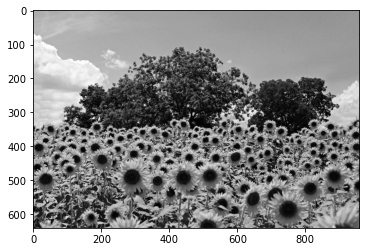

In [69]:
img = plt.imread('image3.png')
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
img = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(img, cmap='gray')
plt.show()

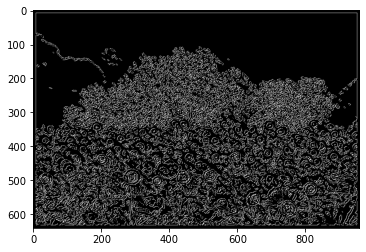

In [71]:
ex = trackScale(img, sigmas=[1.0, 2.0, 3.0], size=17, threshold=0.4)